In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

In [2]:
# example 7.40
print('''H0: the average score is identical in all lectures. Any observed difference is due to chance. u_1 = u_2 = u_3
HA: 
''')

H0: the average score is identical in all lectures. Any observed difference is due to chance. u_1 = u_2 = u_3
HA: 



      count      mean       std
pos1                           
C      64.0  0.301938  0.038171
IF    205.0  0.318385  0.037931
OF    160.0  0.319819  0.042607
H0: the average on-base percentage does not vary across player positions. u_c = u_of = u_if
HA: the average on-base percentage varies across at least between some player positions.

independence: if it's a simple random sample of players, independence condition satisfies.
normality: since the data has too many observations, we'll only look for the extreme outliers, there are no extreme outliers.
the data spread normal.
variability: variability in data don't look quite identical but it looks similar



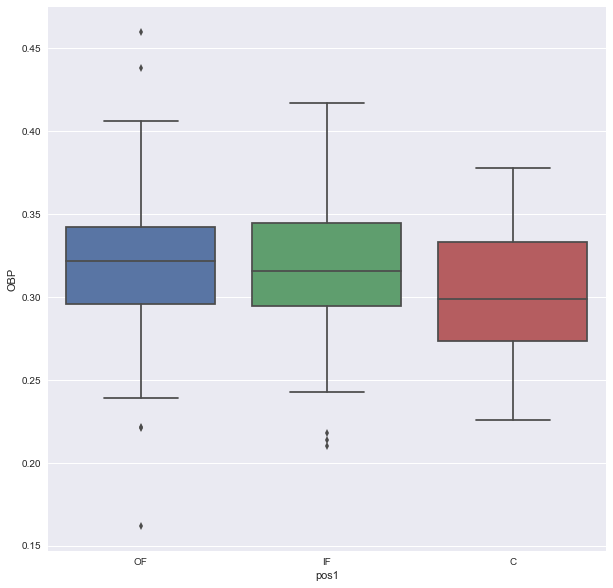

In [5]:
# guided practice 7.42, example 7.43, 7.44
bat18 = pd.read_csv("data/bat18.csv", na_values = "null")
#print(bat18.info())
bat = bat18[ ~((bat18["position"]=="P") | (bat18["position"]=="DH")) & (bat18["AB"] >= 100)][["name","team","position","AB","H","HR","RBI","AVG","OBP"]]
c = ["C"]
of = ['RF', 'LF', 'CF']
bat["pos1"] = bat["position"].apply(lambda x: "C" if x in c else "OF" if x in of else "IF")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sns.boxplot(data=bat, x="pos1", y="OBP", ax=ax)
print(bat.groupby("pos1")["OBP"].describe()[["count","mean","std"]])
print('''H0: the average on-base percentage does not vary across player positions. u_c = u_of = u_if
HA: the average on-base percentage varies across at least between some player positions.

independence: if it's a simple random sample of players, independence condition satisfies.
normality: since the data has too many observations, we'll only look for the extreme outliers, there are no extreme outliers.
the data spread normal.
variability: variability in data don't look quite identical but it looks similar
''')

In [6]:
'''7.35 Fill in the blank. When doing an ANOVA, you observe large differences in means between groups.
Within the ANOVA framework, this would most likely be interpreted as evidence strongly favoring the
hypothesis.'''
print('''When doing an ANOVA, you observe large differences in means between groups.
Within the ANOVA framework, this would most likely be interpreted as evidence strongly favoring the alternative
hypothesis.''')

When doing an ANOVA, you observe large differences in means between groups.
Within the ANOVA framework, this would most likely be interpreted as evidence strongly favoring the alternative
hypothesis.


In [7]:
'''7.36 Which test? We would like to test if students who are in the social sciences, natural sciences, arts
and humanities, and other fields spend the same amount of time studying for this course. What type of test
should we use? Explain your reasoning.'''
print('''ANOVA, because we're testing whether there are differences in multiple groups, we should use ANOVA
to test this problem''')

ANOVA, because we're testing whether there are differences in multiple groups, we should use ANOVA
to test this problem


In [2]:
'''7.37 Chicken diet and weight, Part III. In Exercises 7.27 and 7.29 we compared the effects of two types
of feed at a time. A better analysis would first consider all feed types at once: casein, horsebean, linseed,
meat meal, soybean, and sunflower. The ANOVA output below can be used to test for differences between
the average weights of chicks on different diets.

Conduct a hypothesis test to determine if these data provide convincing evidence that the average weight
of chicks varies across some (or all) groups. Make sure to check relevant conditions. Figures and summary
statistics are shown below.
'''
print('''PREPARE. 
As given in the ANOVA summary table in the example, we should use ANOVA test for this problem. 
H0: every type of feed's effect in average is the same. u_1 = u_2 = ... = u_n
HA: at least one type of feed's effect in average is different.

CHECK. there are three conditions to check for ANOVA:
independence: it's a simple random sample, so independence condition satisfies.
normality: for sunflower, there are some extreme outliers in the data. not every group seems normally distributed.
variance: the variance in groups are not close.
in these conditions, it's not suitable to conduct a hypothesis test using ANOVA for that dataset.
Taking a look at the given side-by-side bar plots,

CALCULATE.
already done in the example.

CONCLUDE.
p value of corresponding f-score is almost 0, so we reject the null hypothesis and conclude,
there's strong evidence in the data that suggests at least some types of chick feed performs different than others.''')

PREPARE. 
As given in the ANOVA summary table in the example, we should use ANOVA test for this problem. 
H0: every type of feed's effect in average is the same. u_1 = u_2 = ... = u_n
HA: at least one type of feed's effect in average is different.

CHECK. there are three conditions to check for ANOVA:
independence: it's a simple random sample, so independence condition satisfies.
normality: for sunflower, there are some extreme outliers in the data. not every group seems normally distributed.
variance: the variance in groups are not close.
in these conditions, it's not suitable to conduct a hypothesis test using ANOVA for that dataset.
Taking a look at the given side-by-side bar plots,

CALCULATE.
already done in the example.

CONCLUDE.
p value of corresponding f-score is almost 0, so we reject the null hypothesis and conclude,
there's strong evidence in the data that suggests at least some types of chick feed performs different than others.


In [1]:
'''7.38 Teaching descriptive statistics. A study compared five different methods for teaching descriptive
statistics. The five methods were traditional lecture and discussion, programmed textbook instruction,
programmed text with lectures, computer instruction, and computer instruction with lectures. 45 students
were randomly assigned, 9 to each method. After completing the course, students took a 1-hour exam.
(a) What are the hypotheses for evaluating if the average test scores are different for the different teaching
methods?
(b) What are the degrees of freedom associated with the F-test for evaluating these hypotheses?
(c) Suppose the p-value for this test is 0.0168. What is the conclusion?'''
print('''a) H0: average test scores of 5 different method groups are the same.
HA: at least one of the 5 different method groups' average test scores are the different than others.
b) 5-1 = 4 degrees of freedom associated with the F-test
C) at least one of the means are different.''')

a) H0: average test scores of 5 different method groups are the same.
HA: at least one of the 5 different method groups' average test scores are the different than others.
b) 5-1 = 4 degrees of freedom associated with the F-test
C) at least one of the means are different.



In [3]:
'''7.39 Coffee, depression, and physical activity. Caffeine is the world's most widely used stimulant, with
approximately 80% consumed in the form of coffee. Participants in a study investigating the relationship
between coffee consumption and exercise were asked to report the number of hours they spent per week on
moderate (e.g., brisk walking) and vigorous (e.g., strenuous sports and jogging) exercise. Based on these
data the researchers estimated the total hours of metabolic equivalent tasks (MET) per week, a value always
greater than 0. The table below gives summary statistics of MET for women in this study based on the
amount of coffee consumed.

(a) Write the hypotheses for evaluating if the average physical activity level varies among the different levels
of coffee consumption.
(b) Check conditions and describe any assumptions you must make to proceed with the test.
(c) Below is part of the output associated with this test. Fill in the empty cells.
(d) What is the conclusion of the test?'''

"7.39 Coffee, depression, and physical activity. Caffeine is the world's most widely used stimulant, with\napproximately 80% consumed in the form of coffee. Participants in a study investigating the relationship\nbetween coffee consumption and exercise were asked to report the number of hours they spent per week on\nmoderate (e.g., brisk walking) and vigorous (e.g., strenuous sports and jogging) exercise. Based on these\ndata the researchers estimated the total hours of metabolic equivalent tasks (MET) per week, a value always\ngreater than 0. The table below gives summary statistics of MET for women in this study based on the\namount of coffee consumed.\n\n(a) Write the hypotheses for evaluating if the average physical activity level varies among the different levels\nof coffee consumption.\n(b) Check conditions and describe any assumptions you must make to proceed with the test.\n(c) Below is part of the output associated with this test. Fill in the empty cells.\n(d) What is the conc

In [28]:
'''7.40 Student performance across discussion sections. A professor who teaches a large introductory
statistics class (197 students) with eight discussion sections would like to test if student performance differs
by discussion section, where each discussion section has a different teaching assistant. The summary table
below shows the average final exam score for each discussion section as well as the standard deviation of
scores and the number of students in each section.
The ANOVA output below can be used to test for differences between the average scores from the different
discussion sections.
Conduct a hypothesis test to determine if these data provide convincing evidence that the average score varies
across some (or all) groups. Check conditions and describe any assumptions you must make to proceed with
the test.'''

'7.40 Student performance across discussion sections. A professor who teaches a large introductory\nstatistics class (197 students) with eight discussion sections would like to test if student performance differs\nby discussion section, where each discussion section has a different teaching assistant. The summary table\nbelow shows the average final exam score for each discussion section as well as the standard deviation of\nscores and the number of students in each section.\nThe ANOVA output below can be used to test for differences between the average scores from the different\ndiscussion sections.\nConduct a hypothesis test to determine if these data provide convincing evidence that the average score varies\nacross some (or all) groups. Check conditions and describe any assumptions you must make to proceed with\nthe test.'

In [29]:
'''7.41 GPA and major. Undergraduate students taking an introductory statistics course at Duke University
conducted a survey about GPA and major. The side-by-side box plots show the distribution of GPA among
three groups of majors. Also provided is the ANOVA output.
(a) Write the hypotheses for testing for a difference between average GPA across majors.
(b) What is the conclusion of the hypothesis test?
(c) How many students answered these questions on the survey, i.e. what is the sample size?'''

'7.41 GPA and major. Undergraduate students taking an introductory statistics course at Duke University\nconducted a survey about GPA and major. The side-by-side box plots show the distribution of GPA among\nthree groups of majors. Also provided is the ANOVA output.\n(a) Write the hypotheses for testing for a difference between average GPA across majors.\n(b) What is the conclusion of the hypothesis test?\n(c) How many students answered these questions on the survey, i.e. what is the sample size?'

In [12]:
'''7.42 Work hours and education. The General Social Survey collects data on demographics, education,
and work, among many other characteristics of US residents. Using ANOVA, we can consider educa-
tional attainment levels for all 1,172 respondents at once. Below are the distributions of hours worked by
educational attainment and relevant summary statistics that will be helpful in carrying out this analysis.

(a) Write hypotheses for evaluating whether the average number of hours worked varies across the ve
groups.
(b) Check conditions and describe any assumptions you must make to proceed with the test.
(c) Below is part of the output associated with this test. Fill in the empty cells.
(d) What is the conclusion of the test?
'''

"7.42 Work hours and education. The General Social Survey collects data on demographics, education,\nand work, among many other characteristics of US residents.37 Using ANOVA, we can consider educa-\ntional attainment levels for all 1,172 respondents at once. Below are the distributions of hours worked by\neducational attainment and relevant summary statistics that will be helpful in carrying out this analysis.\nEducational attainment\nLess than HS HS Jr Coll Bachelor's Graduate Total\nMean 38.67 39.6 41.39 42.55 40.85 40.45\nSD 15.81 14.97 18.1 13.62 15.51 15.17\nn 121 546 97 253 155 1,172\nHours worked per week\nLess than HS HS Jr Coll Bachelor's Graduate\n0\n20\n40\n60\n80\n(a) Write hypotheses for evaluating whether the average number of hours worked varies across the \nve\ngroups.\n(b) Check conditions and describe any assumptions you must make to proceed with the test.\n(c) Below is part of the output associated with this test. Fill in the empty cells.\nDf Sum Sq Mean Sq F-value 

In [13]:
'''7.43 True / False: ANOVA, Part I. Determine if the following statements are true or false in ANOVA, and
explain your reasoning for statements you identify as false.
(a) As the number of groups increases, the modified significance level for pairwise tests increases as well.
(b) As the total sample size increases, the degrees of freedom for the residuals increases as well.
(c) The constant variance condition can be somewhat relaxed when the sample sizes are relatively consistent
across groups.
(d) The independence assumption can be relaxed when the total sample size is large.'''

'7.43 True / False: ANOVA, Part I. Determine if the following statements are true or false in ANOVA, and\nexplain your reasoning for statements you identify as false.\n(a) As the number of groups increases, the modi\ned signi\ncance level for pairwise tests increases as well.\n(b) As the total sample size increases, the degrees of freedom for the residuals increases as well.\n(c) The constant variance condition can be somewhat relaxed when the sample sizes are relatively consistent\nacross groups.\n(d) The independence assumption can be relaxed when the total sample size is large.'

In [14]:
'''7.44 Child care hours. The China Health and Nutrition Survey aims to examine the eects of the health,
nutrition, and family planning policies and programs implemented by national and local governments.38 It,
for example, collects information on number of hours Chinese parents spend taking care of their children
under age 6. The side-by-side box plots below show the distribution of this variable by educational attainment
of the parent. Also provided below is the ANOVA output for comparing average hours across educational
attainment categories.
Child care hours
Primary school Lower middle school Upper middle school Technical or vocational College
0
50
100
150
Df Sum Sq Mean Sq F value Pr(>F)
education 4 4142.09 1035.52 1.26 0.2846
Residuals 794 653047.83 822.48
(a) Write the hypotheses for testing for a dierence between the average number of hours spent on child
care across educational attainment levels.
(b) What is the conclusion of the hypothesis test?'''

'7.44 Child care hours. The China Health and Nutrition Survey aims to examine the e\nects of the health,\nnutrition, and family planning policies and programs implemented by national and local governments.38 It,\nfor example, collects information on number of hours Chinese parents spend taking care of their children\nunder age 6. The side-by-side box plots below show the distribution of this variable by educational attainment\nof the parent. Also provided below is the ANOVA output for comparing average hours across educational\nattainment categories.\nChild care hours\nPrimary school Lower middle school Upper middle school Technical or vocational College\n0\n50\n100\n150\nDf Sum Sq Mean Sq F value Pr(>F)\neducation 4 4142.09 1035.52 1.26 0.2846\nResiduals 794 653047.83 822.48\n(a) Write the hypotheses for testing for a di\nerence between the average number of hours spent on child\ncare across educational attainment levels.\n(b) What is the conclusion of the hypothesis test?'

In [15]:
'''7.45 Prison isolation experiment, Part II. Exercise 7.31 introduced an experiment that was conducted
with the goal of identifying a treatment that reduces subjects' psychopathic deviant T scores, where this
score measures a person's need for control or his rebellion against control. In Exercise 7.31 you evaluated the
success of each treatment individually. An alternative analysis involves comparing the success of treatments.
The relevant ANOVA output is given below.
Df Sum Sq Mean Sq F value Pr(>F)
treatment 2 639.48 319.74 3.33 0.0461
Residuals 39 3740.43 95.91
spooled = 9:793 on df = 39
(a) What are the hypotheses?
(b) What is the conclusion of the test? Use a 5% signicance level.
(c) If in part (b) you determined that the test is signicant, conduct pairwise tests to determine which
groups are dierent from each other. If you did not reject the null hypothesis in part (b), recheck your
answer. Summary statistics for each group are provided below
Tr 1 Tr 2 Tr 3
Mean 6.21 2.86 -3.21
SD 12.3 7.94 8.57
n 14 14 14'''

"7.45 Prison isolation experiment, Part II. Exercise 7.31 introduced an experiment that was conducted\nwith the goal of identifying a treatment that reduces subjects' psychopathic deviant T scores, where this\nscore measures a person's need for control or his rebellion against control. In Exercise 7.31 you evaluated the\nsuccess of each treatment individually. An alternative analysis involves comparing the success of treatments.\nThe relevant ANOVA output is given below.\nDf Sum Sq Mean Sq F value Pr(>F)\ntreatment 2 639.48 319.74 3.33 0.0461\nResiduals 39 3740.43 95.91\nspooled = 9:793 on df = 39\n(a) What are the hypotheses?\n(b) What is the conclusion of the test? Use a 5% signi\ncance level.\n(c) If in part (b) you determined that the test is signi\ncant, conduct pairwise tests to determine which\ngroups are di\nerent from each other. If you did not reject the null hypothesis in part (b), recheck your\nanswer. Summary statistics for each group are provided below\nTr 1 Tr 2 Tr 3\nMe

In [16]:
'''7.46 True / False: ANOVA, Part II. Determine if the following statements are true or false, and explain
your reasoning for statements you identify as false.
If the null hypothesis that the means of four groups are all the same is rejected using ANOVA at a 5%
signicance level, then ...
(a) we can then conclude that all the means are dierent from one another.
(b) the standardized variability between groups is higher than the standardized variability within groups.
(c) the pairwise analysis will identify at least one pair of means that are signicantly dierent.
(d) the appropriate  to be used in pairwise comparisons is 0.05 / 4 = 0.0125 since there are four groups.'''

'7.46 True / False: ANOVA, Part II. Determine if the following statements are true or false, and explain\nyour reasoning for statements you identify as false.\nIf the null hypothesis that the means of four groups are all the same is rejected using ANOVA at a 5%\nsigni\ncance level, then ...\n(a) we can then conclude that all the means are di\nerent from one another.\n(b) the standardized variability between groups is higher than the standardized variability within groups.\n(c) the pairwise analysis will identify at least one pair of means that are signi\ncantly di\nerent.\n(d) the appropriate \n to be used in pairwise comparisons is 0.05 / 4 = 0.0125 since there are four groups.'